In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle

from numpy.random import randint,rand,randn,choice,sample


plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace, array, arange,meshgrid

from scipy.integrate import quad,dblquad

def stripes(lev,a,b,c,d,steps=100):
    """Finds subitervals of [a,b] where
    c(x) <= lev <= d(x)
    for each x in the subinterval.
    
    Returns: list of tuples (x_i,y_i)"""
#     on = False 
    out = []
    tmp = []
    for i in np.linspace(a,b,steps):
        if c(i) <= lev <= d(i):
            xi = i
            if not tmp:
                tmp.append(xi)
        else:
            if tmp:
                out.append((tmp[0],xi))
                tmp = []
    if tmp:
        out.append((tmp[0],xi))
        tmp = []
    return out

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

Compute the following line integral. 
 $$\int_C \left(x^2-xy\right)\,dx + (y^2-x^2)\,dy$$ where $C$ is oriented curve below. 

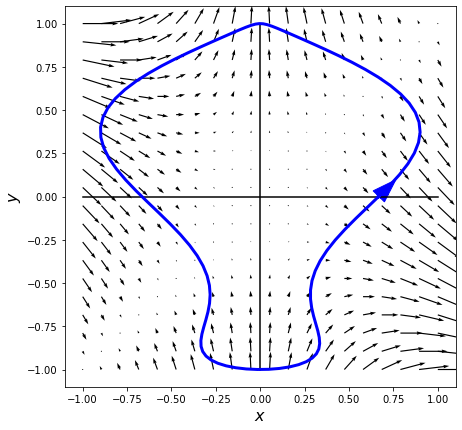

In [5]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x**2 - x*y,y**2 - x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(2/3,0,.001,.001,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.plot((2/3+1/3*sin(6*pi*t))*cos(2*pi*t),sin(2*pi*t),'b',lw=3);

## Curl and Div in 2D

If $\vec F(x,y) = \langle P(x,y),Q(x,y) \rangle $, then 

$$\operatorname{curl} \vec F (x,y) = Q_x - P_y = \text{ "circulation density"}$$

  - positive $\leftrightarrow$ counterclockwise spin
  - negative $\leftrightarrow$ clockwise spin
  - zero $\leftrightarrow$ irrotational

$$\operatorname{div} \vec F (x,y) = P_x + Q_y = \text{ "flux density"}$$
  - positive $\leftrightarrow$ expansion
  - negative $\leftrightarrow$ compression
  - zero $\leftrightarrow$ incompressibility

In [17]:
@interact
def _(colorplot=["None","Curl","Divergence"]):
    x = y = np.linspace(-1,1,20)
    x,y = np.meshgrid(x,y)
    plt.figure(figsize=(7,7))
    plt.quiver(x,y,x**2 - x*y,y**2 - x**2);
    x = y = np.linspace(-1,1,100)
    x,y = np.meshgrid(x,y)
    if colorplot == "Divergence":
        plt.pcolormesh(x,y,2*x + y,alpha=.3)
        # plt.contourf(x,y,2*x + y,alpha=.3)
#         plt.colorbar()
    elif colorplot == "Curl":
        plt.pcolormesh(x,y,-x ,alpha=.3)
    plt.colorbar(alpha=.3)
    for c in 'xy':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
#     t= np.linspace(0,1,100)    
    # plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
    # plt.arrow(2/3,0,.001,.001,width=.03,color='b')
    plt.plot([0,0],[-1,1],'k')
    plt.plot([-1,1],[0,0],'k')
    # plt.plot((2/3+1/3*sin(6*pi*t))*cos(2*pi*t),sin(2*pi*t),'b',lw=3);

interactive(children=(Dropdown(description='colorplot', options=('None', 'Curl', 'Divergence'), value='None'),…

## Example

Look at the vector field below. At the point $(.2,.2)$ (center of the red circle), is the curl positive, negative or 0?

How about the divergence?

In [3]:
@interact(zoom=(.2,1,.1),th=(0,pi/2,pi/10))
def _(zoom=1,th=pi/2,P=fixed(lambda x,y: -y - x),Q=fixed(lambda x,y: x - y)):
    plt.figure(figsize=(7,7))
    x = y = np.concatenate([arange(.2,.2+1.2*zoom,.05),arange(.2,.2-1.2*zoom,-.05)])
    x,y = meshgrid(x,y)
    plt.quiver(x,y,P(x,y),Q(x,y))
    plt.plot([0,0],[-2,2],'k')
    plt.plot([-2,2],[0,0],'k')
    t = linspace(0,2*pi,57)
    plt.plot(.1*cos(t)+.2,.1*sin(t)+.2,'r',lw=2)
    plt.quiver(.1*cos(t)+.2,.1*sin(t)+.2,.1*cos(t)*cos(th)-.1*sin(t)*sin(th),.1*sin(t)*cos(th)+.1*cos(t)*sin(th),color='r',alpha=(zoom < .4) and 1 or 0)
    for c in 'xy':
        getattr(plt,f"{c}lim")(.2-zoom,.2+zoom)
    

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, min=0.2), FloatSlider(value=1.570796…

The vector field above is $$\langle -y-x,x-y \rangle.$$ Compute these exactly.

## Example

At the point $(-1,1/2)$ determine if each of the divergence and scalar curl is positive, negative or 0.

In [86]:
data = np.array((-1 + .14*randn(113),.5 + .14*randn(113)))

def eul(pt,F,dt=1/25):
    out = pt + dt*F(*pt)
    for x in out:
        if np.abs(x) > 3:
            out = pt
            # out[np.random.randint(0,3)] = np.random.randint(0,2)
#             out[2] = -1
            break
    return out

In [90]:
basefunc = [lambda x,y: 1 + 0*x, lambda x,y: x**2, lambda x,y: x, lambda x,y: y, lambda x,y: y**2]
basefunctex = ("1","x^2","x","y","y^2")
f,g = randint(0,len(basefunc) - 1),randint(0,len(basefunc) - 1)
pm1,pm2 = randint(0,2),randint(0,2)
d2 = d2 = data.copy()
d = []
for i in range(101):
    d2 = np.apply_along_axis(lambda x: eul(x,lambda x,y: np.array(((-1)**pm1*basefunc[f](x,y),(-1)**pm2*basefunc[g](x,y))),.01),0,d2)
    d.append(d2)
@interact(n=(0,100,1))
def _(n=0,formula=False):
#     d2 = data.copy()
#     for i in range(n):
#         d2 = np.apply_along_axis(lambda x: eul(x,F,.01),0,d2)
    x = y = linspace(-2,2,16)
    x,y = meshgrid(x,y)
    plt.scatter(-1,1/2,s=100,color='r')
    plt.scatter(*d[n])
    plt.quiver(x,y,(-1)**pm1*basefunc[f](x,y),(-1)**pm2*basefunc[g](x,y));
    if formula:
        plt.title(f"$\\langle {['','-'][pm1]}{basefunctex[f]},{['','-'][pm2]}{basefunctex[g]} \\rangle$",fontsize=20);
    for c in 'xy':
        getattr(plt,f"{c}lim")((-2,2))

interactive(children=(IntSlider(value=0, description='n'), Checkbox(value=False, description='formula'), Outpu…

##  In $\RR^3$

$$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ 

$$\operatorname{div}\vec F = \nabla \cdot \vec F = P_x  + Q_y  + R_z $$

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$ 

<p style="padding-bottom:40%;"> </p>

## Example

Compute the divergence and curl of $$ \vec F(x,y,z) = xy \,\vec i +  (5 - z^2 y)\,\vec j +  (x^2 + y^2)\,\vec k $$ at the point $(1,-2,3)$.

<p style="padding-bottom:40%;"> </p>

## Exercise 

If $f$ and $\vec F$ are smooth scalar and vector fields in $\RR^3$, respectively, which of the following are meaningful?

  1. $(\nabla f)f$
  1. $\vec F \cdot \nabla f$
  1. $\nabla\cdot \nabla f$
  1. $\nabla \times \nabla \cdot \vec F$  
  1. $\nabla \times \nabla f$
  1. $\nabla \cdot \nabla \times \vec F $
  
Which are identically 0?
  